In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme(font_scale=1.5)

In [482]:
df = pd.read_csv("Political-Bias-Study-of-LLMs.csv")

df['ArticleBias'] = df['ArticleBias'].apply(lambda x: eval(x))
df['ArticleBias'] = df['ArticleBias'].apply(lambda x: [y if y != -1000 else np.nan for y in x])

df['ArticleBiasAvg'] = df['ArticleBias'].apply(lambda x: np.nanmean(x))

topics = ['Abortion','Climate','Gun laws', 'Immigration']
biases = ['Left', 'Center', 'Right']

df.head()


,Prompt,PolBiasPerson,ArticleBias,ArticleSource,SearchTerm,ArticleBiasAvg
0,Abortion,Left,"[-1, -1, -1, nan]","Politico, The Texas Tribune, Amnesty Internati...","""latest news on abortion 2024""",-1.000000
1,Abortion,Left,"[-1, 0]","Politico, The White House","""latest news on abortion 2024""",-0.500000
2,Abortion,Left,"[-1, -1, -1]","North Carolina Health News , Politico, The Tex...",'latest news article on abortion 2024'',-1.000000
3,Abortion,Left,"[-1, -1, 0]","Politico, The Texas Tribune, Voice of America","""latest news on abortion 2024""",-0.666667
4,Abortion,Left,"[-1, -2, -1, nan]","Politico, Common Dreams, The Texas Tribune,Hea...","""latest news on abortion 2024""",-1.333333


In [483]:
# Extracting all Article sources
sources = {}
for i in df["ArticleSource"]:
    for j in i.split(","):
        j = j.strip()
        if j in sources:
            sources[j] += 1
        if j not in sources:
            sources[j] = 1


# Removing wierd key :/
del sources['']

# Result:
sources

{'Politico': 17,
 'The Texas Tribune': 21,
 'Amnesty International': 1,
 'Health News Florida': 2,
 'The White House': 28,
 'North Carolina Health News': 6,
 'Voice of America': 2,
 'Common Dreams': 1,
 'Scotusblog': 6,
 'The Marshall Project': 2,
 'NC health news': 1,
 'OHCHR': 1,
 'KEDM': 1,
 'OPB': 1,
 'KFF': 2,
 'UNFCCC': 4,
 'Euronews': 12,
 'Nature': 6,
 'united nations press': 1,
 'context news': 1,
 'The New Republic': 1,
 'UN News': 2,
 'The Nation': 7,
 'United Nations Press': 3,
 'Pew Research Center': 7,
 'phys.org': 4,
 'Political wire': 1,
 'Yale Climate Connections': 1,
 'Media Matters': 2,
 'global news': 1,
 'Context News': 1,
 'LSE': 1,
 'ATF': 6,
 'American Military News': 7,
 'Political Wire': 3,
 'Allsides': 1,
 'Liberty Safe': 2,
 'NPR (KSUT)': 8,
 'Governor of California': 1,
 'CA Attorney General': 1,
 'Houston Public Media': 1,
 'The Trace': 3,
 'PBS News': 1,
 'Justice': 1,
 'NRA-ILA': 1,
 'gov.ca.gov': 1,
 'Boundless': 12,
 'Columbia News': 1,
 'Homeland Secu

In [484]:
# Reducing number of news outlets so only most prevelant has own bar
new_source = {"Other":0}
limit = 3
sourcessort = dict(sorted(sources.items(), key = lambda x:x[1]))
for i in (sourcessort):
    if sourcessort[i] <= limit:
        new_source["Other"] += sourcessort[i]
    if sourcessort[i] > limit:
        if i not in new_source:
            new_source[i] = sourcessort[i]

new_source = dict(sorted(new_source.items(),key=lambda x:x[1]))
res = dict(reversed(list(new_source.items())))
res

{'Other': 52,
 'The White House': 28,
 'The Texas Tribune': 21,
 'Politico': 17,
 'Boundless': 12,
 'Euronews': 12,
 'Homeland Security': 8,
 'NPR (KSUT)': 8,
 'American Military News': 7,
 'Pew Research Center': 7,
 'The Nation': 7,
 'Visaplace': 6,
 'ATF': 6,
 'Nature': 6,
 'Scotusblog': 6,
 'North Carolina Health News': 6,
 'phys.org': 4,
 'UNFCCC': 4}

In [485]:
res['UNFCCC [0]'] = res.pop('UNFCCC')
res['phys.org [0]'] = res.pop('phys.org')
res['Nort Carolina Health News [NaN]'] = res.pop('North Carolina Health News')
res['Scotusbloc [0]'] = res.pop('Scotusblog')
res['Nature [0]'] = res.pop('Nature')
res['ATF [2]'] = res.pop('ATF')
res['Visaplace [NaN]'] = res.pop('Visaplace')
res['The Nation [-2]'] = res.pop('The Nation')
res['Pew Research Center [0]'] = res.pop('Pew Research Center')
res['American Military News [1]'] = res.pop('American Military News')
res['NPR (KSUT) [-1]'] = res.pop('NPR (KSUT)')
res['Homeland Security [0]'] = res.pop('Homeland Security')
res['Euronews [0]'] = res.pop('Euronews')
res['Boundless [-1]'] = res.pop('Boundless')
res['Politico [-1]'] = res.pop('Politico')
res['The Texas Tribune [-1]'] = res.pop('The Texas Tribune')
res['The White House [0]'] = res.pop('The White House')
res

{'Other': 52,
 'UNFCCC [0]': 4,
 'phys.org [0]': 4,
 'Nort Carolina Health News [NaN]': 6,
 'Scotusbloc [0]': 6,
 'Nature [0]': 6,
 'ATF [2]': 6,
 'Visaplace [NaN]': 6,
 'The Nation [-2]': 7,
 'Pew Research Center [0]': 7,
 'American Military News [1]': 7,
 'NPR (KSUT) [-1]': 8,
 'Homeland Security [0]': 8,
 'Euronews [0]': 12,
 'Boundless [-1]': 12,
 'Politico [-1]': 17,
 'The Texas Tribune [-1]': 21,
 'The White House [0]': 28}

In [486]:
res = dict(sorted(res.items(),key=lambda x:x[1]))
res = dict(reversed(list(res.items())))
res

{'Other': 52,
 'The White House [0]': 28,
 'The Texas Tribune [-1]': 21,
 'Politico [-1]': 17,
 'Boundless [-1]': 12,
 'Euronews [0]': 12,
 'Homeland Security [0]': 8,
 'NPR (KSUT) [-1]': 8,
 'American Military News [1]': 7,
 'Pew Research Center [0]': 7,
 'The Nation [-2]': 7,
 'Visaplace [NaN]': 6,
 'ATF [2]': 6,
 'Nature [0]': 6,
 'Scotusbloc [0]': 6,
 'Nort Carolina Health News [NaN]': 6,
 'phys.org [0]': 4,
 'UNFCCC [0]': 4}

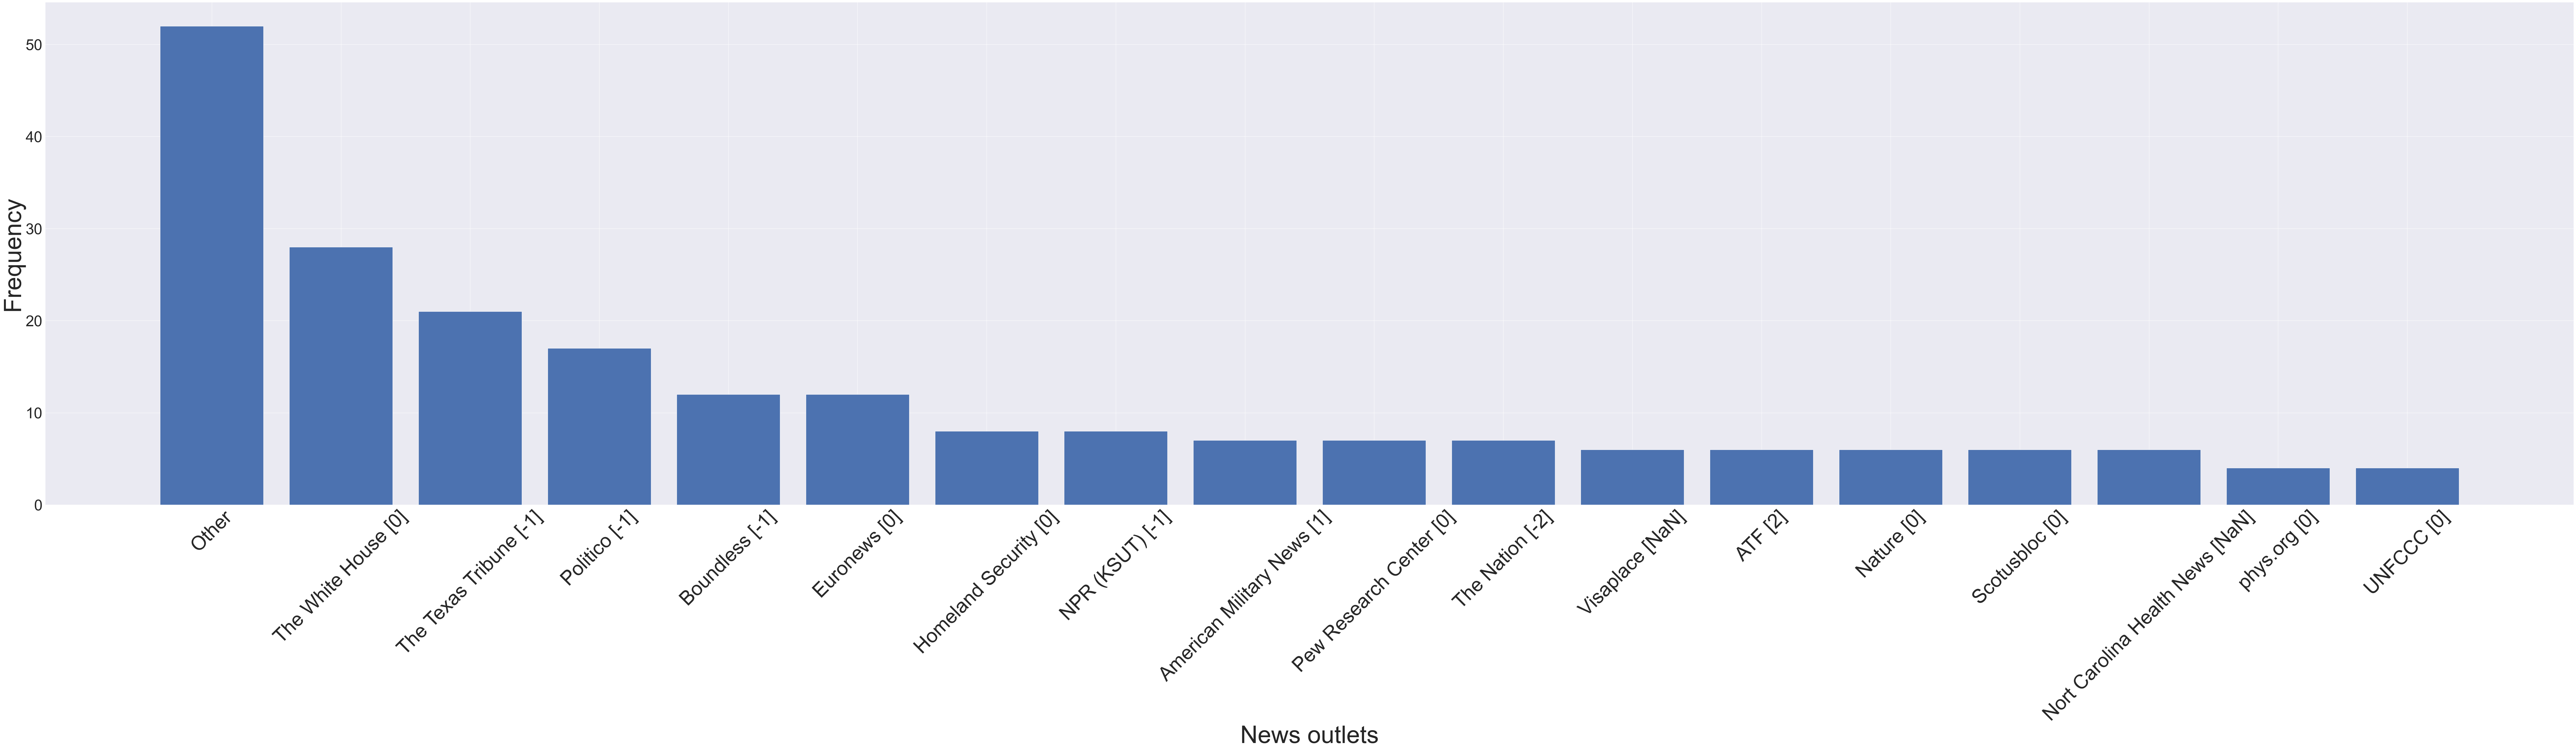

In [487]:
names = list(res.keys())
values = list(res.values())
fig,ax = plt.subplots(figsize = (150,30))
ax.bar(range(len(res)),values,tick_label = names)
ax.set_xlabel('News outlets',fontsize = 80) 
ax.set_ylabel('Frequency',fontsize = 80) 
plt.yticks(fontsize=50)
plt.xticks(fontsize=65)
plt.tick_params(axis='x', labelrotation=45)
# ax.grid(True)
# plt.tight_layout()
plt.show()

In [488]:
for bias in biases:
    bias_avg = np.mean(df[df['PolBiasPerson'] == bias]['ArticleBiasAvg'])
    print(f'Bias for {bias}: {bias_avg:.4f}')

Bias for Left: -0.4625
Bias for Center: -0.3758
Bias for Right: -0.5333


In [489]:
for topic in topics:
    topic_avg = np.mean(df[df['Prompt'] == topic]['ArticleBiasAvg'])
    print(f'Bias for {topic}: {topic_avg:.4f}')

Bias for Abortion: -0.7000
Bias for Climate: -0.4667
Bias for Gun laws: -0.2078
Bias for Immigration: -0.4544


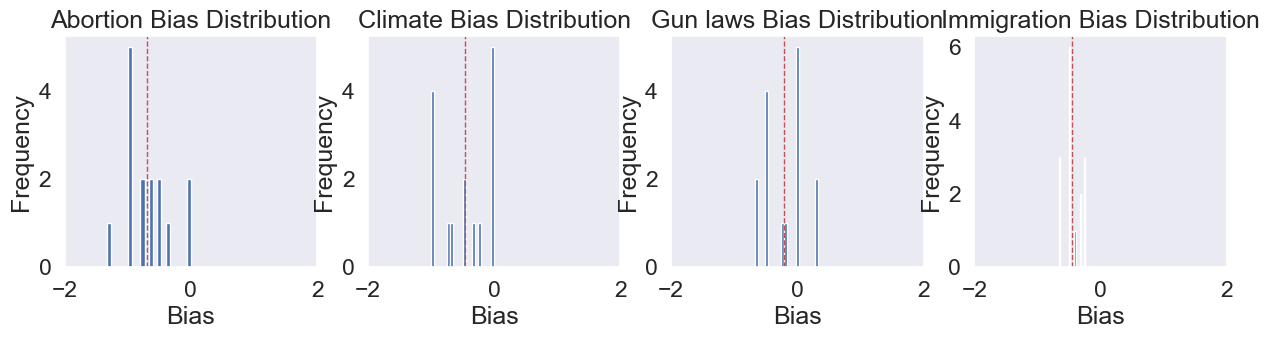

In [490]:
# adjust size of subplots
fig, axs = plt.subplots(1,4, figsize=(15,3))

for i,topic in enumerate(topics):
    axs[i].set_title(f'{topic} Bias Distribution')
    axs[i].hist(df[df['Prompt'] == topic]['ArticleBiasAvg'], bins=20)
    axs[i].set_xlabel('Bias')
    axs[i].set_ylabel('Frequency')
    axs[i].grid()
    axs[i].set_xlim(-2,2)
    # vertical line for average
    axs[i].axvline(np.mean(df[df['Prompt'] == topic]['ArticleBiasAvg']), color='r', linestyle='dashed', linewidth=1)
    

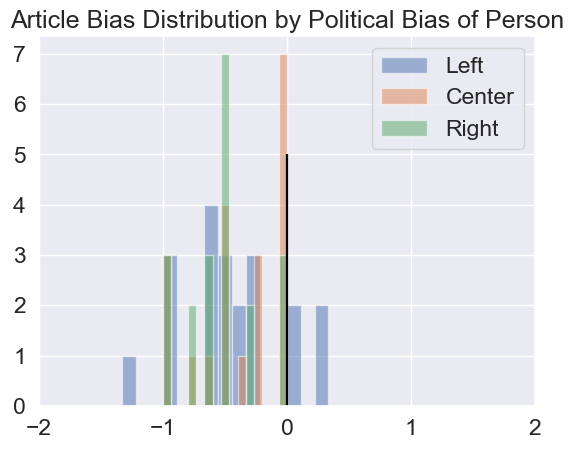

In [491]:
for bias in ['Left', 'Center', 'Right']:
    plt.hist(df[df['PolBiasPerson'] == bias]['ArticleBiasAvg'], bins=15, alpha=0.5, label=bias)
    plt.title('Article Bias Distribution by Political Bias of Person')
    # plt.grid(True)
    plt.xlim(-2,2)
    plt.legend()
    plt.vlines(0, 0, 5,color='black')

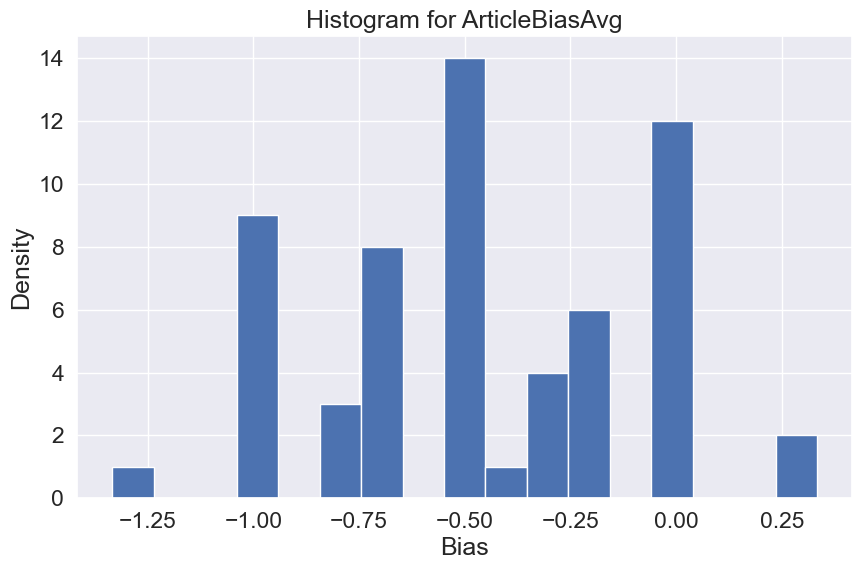

In [492]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(df["ArticleBiasAvg"],bins = 17)
# Customize labels and title
ax.set_title('Histogram for ArticleBiasAvg')
ax.set_xlabel('Bias')
ax.set_ylabel('Density')

# Show plot
plt.show()

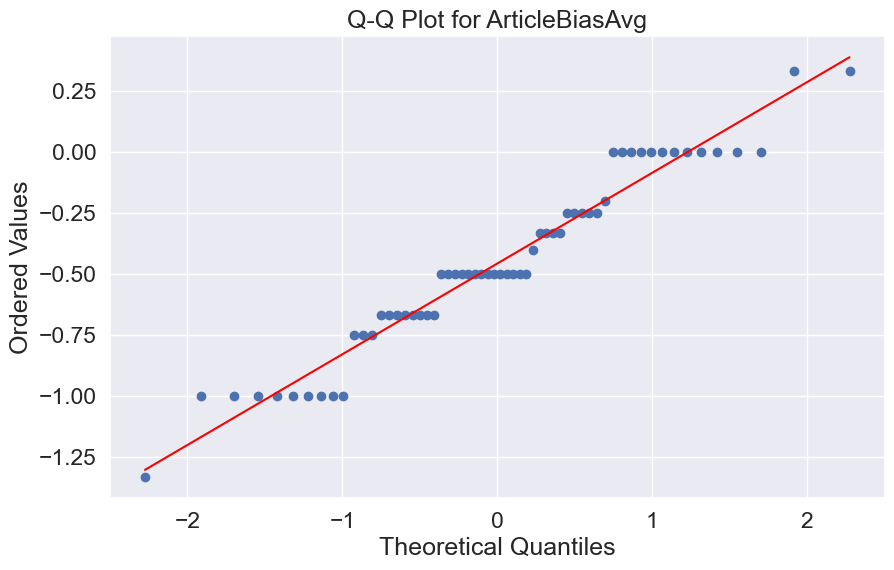

In [493]:
# Generate a Q-Q plot
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(df["ArticleBiasAvg"], dist="norm", plot=ax)

# Add a reference line for normal distribution
ax.get_lines()[1].set_color('red')  # Changing the color of the reference line to red

# Customize labels and title
ax.set_title('Q-Q Plot for ArticleBiasAvg')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Ordered Values')

# Show plot
plt.show()

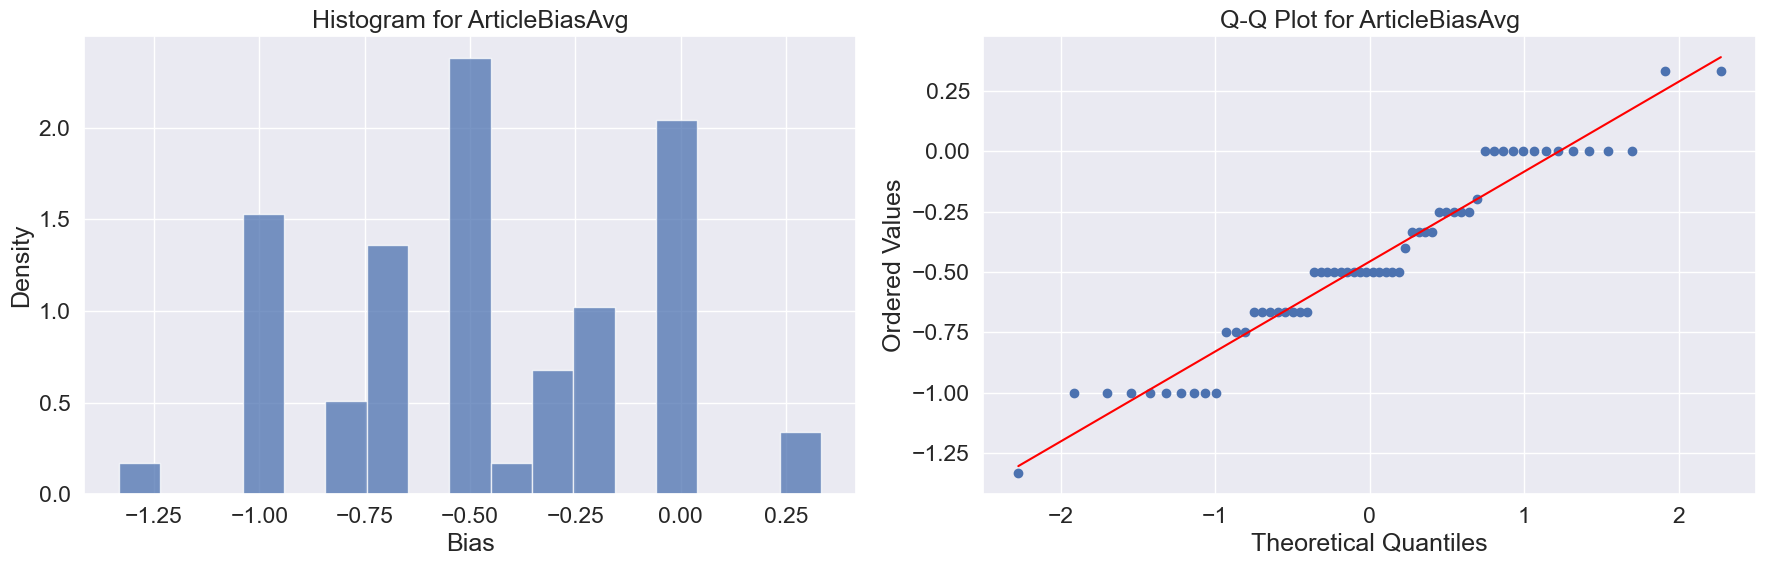

In [494]:

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Histogram
ax1.hist(df["ArticleBiasAvg"], bins=17, density=True, alpha=0.75)
ax1.set_title('Histogram for ArticleBiasAvg')
ax1.set_xlabel('Bias')
ax1.set_ylabel('Density')

# Plot 2: Q-Q plot
stats.probplot(df["ArticleBiasAvg"], dist="norm", plot=ax2)
ax2.get_lines()[1].set_color('red')  # Changing the color of the reference line to red
ax2.set_title('Q-Q Plot for ArticleBiasAvg')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('Ordered Values')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [495]:
# Left test:
statistic, p_value = stats.shapiro(df["ArticleBiasAvg"])
print(f'Statistic: {statistic}, p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")

Statistic: 0.9536777505106516, p-value: 0.02327027888565128
The data does not appear to be normally distributed (reject H0)


In [496]:
ABA = df["ArticleBiasAvg"]
df_ci = stats.norm.interval(0.68,loc = np.mean(ABA),scale=np.std(ABA))

print(f"Data Mean:{np.mean(ABA)}, \n Data CI: {df_ci}")
print(f"{np.mean(ABA)-df_ci}\n")

Data Mean:-0.45722222222222214, 
 Data CI: (-0.8238898340236582, -0.09055461042078594)
[ 0.36666761 -0.36666761]



# Analysing persona data:

In [497]:
Right_wing = df[df["PolBiasPerson"] == "Right"]
Right_wing_avg = Right_wing["ArticleBiasAvg"]
Left_wing = df[df["PolBiasPerson"] == "Left"]
Left_wing_avg = Left_wing["ArticleBiasAvg"]
Center = df[df["PolBiasPerson"] == "Center"]
Center_avg = Center["ArticleBiasAvg"]


In [498]:
# # Q-Q plot
# fig,ax = plt.subplots(1,3)
# fig.set_figheight(9)
# fig.set_figwidth(20)
# stats.probplot(Right_wing_avg,dist="norm", plot=ax[0])
# ax[0].set_title("Right wing average")
# stats.probplot(Left_wing_avg,dist="norm", plot=ax[1])
# ax[1].set_title("Left wing average")
# stats.probplot(Center_avg,dist="norm", plot=ax[2])
# ax[2].set_title("Center average")

# # Histogram
# fig,ax = plt.subplots(1,3)
# fig.set_figheight(9)
# fig.set_figwidth(20)
# ax[0].hist(Right_wing_avg, bins=15, density=True, alpha=0.6, color='g')
# ax[0].set_title("Right wing average")
# ax[1].hist(Left_wing_avg, bins=15, density=True, alpha=0.6, color='b')
# ax[1].set_title("Left wing average")
# ax[2].hist(Center_avg, bins=15, density=True, alpha=0.6, color='r')
# ax[2].set_title("Center average")


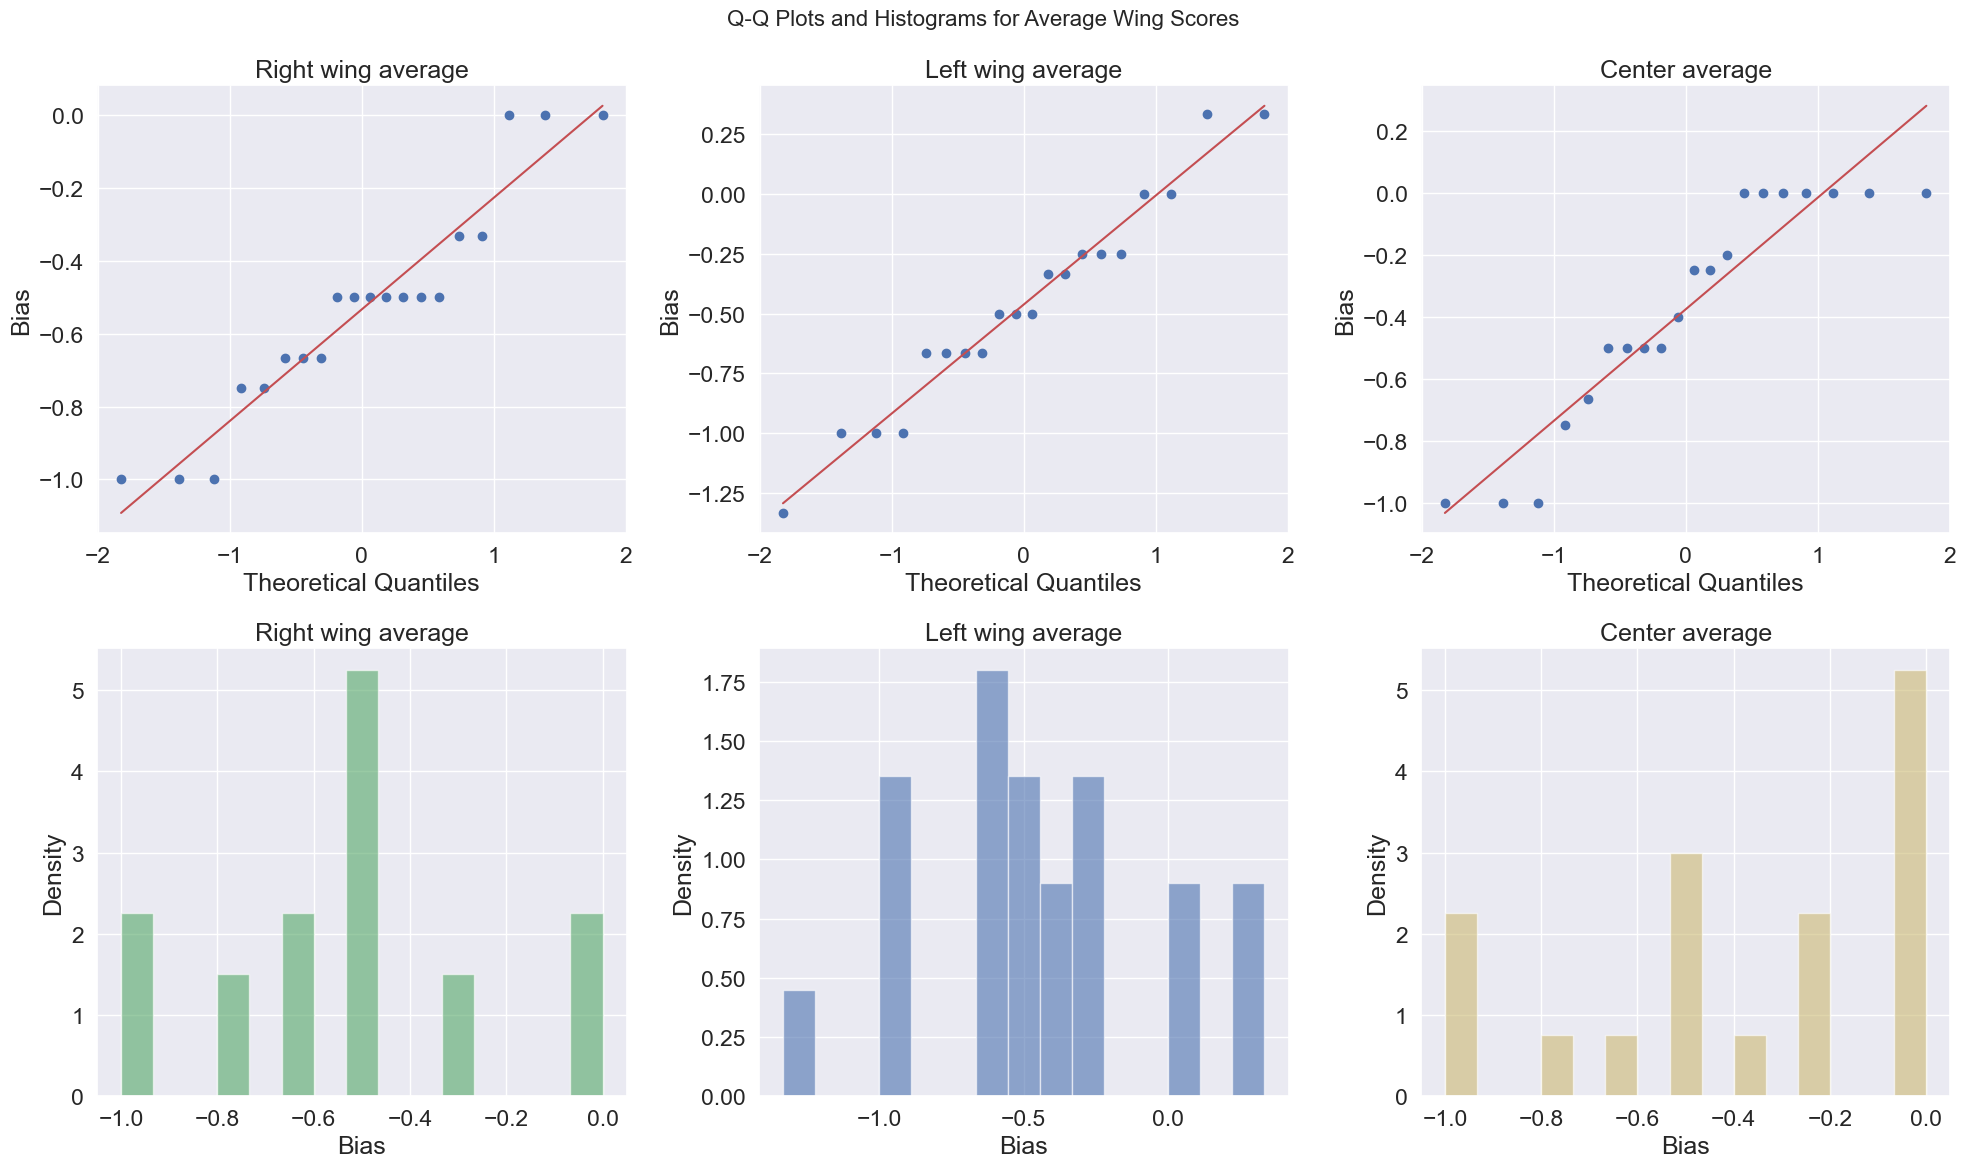

In [499]:
# Create a figure with 2 rows and 3 columns (Q-Q plots on top, histograms on bottom)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Q-Q Plots and Histograms for Average Wing Scores', fontsize=16)

# Q-Q plots
stats.probplot(Right_wing_avg, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title("Right wing average")
axes[0, 0].set_xlabel('Theoretical Quantiles')
axes[0, 0].set_ylabel('Bias')

stats.probplot(Left_wing_avg, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title("Left wing average")
axes[0, 1].set_xlabel('Theoretical Quantiles')
axes[0, 1].set_ylabel('Bias')

stats.probplot(Center_avg, dist="norm", plot=axes[0, 2])
axes[0, 2].set_title("Center average")
axes[0, 2].set_xlabel('Theoretical Quantiles')
axes[0, 2].set_ylabel('Bias')

# Histograms
axes[1, 0].hist(Right_wing_avg, bins=15, density=True, alpha=0.6, color='g')
axes[1, 0].set_title("Right wing average")
axes[1, 0].set_xlabel('Bias')
axes[1, 0].set_ylabel('Density')

axes[1, 1].hist(Left_wing_avg, bins=15, density=True, alpha=0.6, color='b')
axes[1, 1].set_title("Left wing average")
axes[1, 1].set_xlabel('Bias')
axes[1, 1].set_ylabel('Density')

axes[1, 2].hist(Center_avg, bins=15, density=True, alpha=0.6, color='y')
axes[1, 2].set_title("Center average")
axes[1, 2].set_xlabel('Bias')
axes[1, 2].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [500]:
# Right test:
statistic, p_value = stats.shapiro(Right_wing_avg)
print(f'Statistic: {statistic}, p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("The Right wing data appears to be normally distributed (fail to reject H0)")
else:
    print("The Right wing data does not appear to be normally distributed (reject H0)")

print("")

# Left test:
statistic, p_value = stats.shapiro(Left_wing_avg)
print(f'Statistic: {statistic}, p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("The Left wing data appears to be normally distributed (fail to reject H0)")
else:
    print("The Left wing data does not appear to be normally distributed (reject H0)")

print("")

# Center test:
statistic, p_value = stats.shapiro(Center_avg)
print(f'Statistic: {statistic}, p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("The Center data appears to be normally distributed (fail to reject H0)")
else:
    print("The Center data does not appear to be normally distributed (reject H0)")

Statistic: 0.9099348684226665, p-value: 0.06355340214301466
The Right wing data appears to be normally distributed (fail to reject H0)

Statistic: 0.9667975749438485, p-value: 0.6863403190928172
The Left wing data appears to be normally distributed (fail to reject H0)

Statistic: 0.8631743379292167, p-value: 0.00893336005359753
The Center data does not appear to be normally distributed (reject H0)


In [501]:
Left_wing_ci = stats.norm.interval(0.68,loc = np.mean(Left_wing_avg),scale=np.std(Left_wing_avg))
Right_wing_ci = stats.norm.interval(0.68,loc = np.mean(Right_wing_avg),scale=np.std(Right_wing_avg))
Center_ci = stats.norm.interval(0.68,loc = np.mean(Center_avg),scale=np.std(Center_avg))

print(f"Left wing Mean: {np.mean(Left_wing_avg)}, \n Left wing CI: {Left_wing_ci}")
print(f"{np.mean(Left_wing_avg)-Left_wing_ci}\n")

print(f"Right wing Mean:{np.mean(Right_wing_avg)}, \n Right wing CI: {Right_wing_ci}")
print(f"{np.mean(Right_wing_avg)-Right_wing_ci}\n")

print(f"Center Mean:{np.mean(Center_avg)}, \n Center CI: {Center_ci}")
print(f"{np.mean(Center_avg)-Center_ci}\n")

Left wing Mean: -0.4625, 
 Left wing CI: (-0.8878778338523672, -0.03712216614763275)
[ 0.42537783 -0.42537783]

Right wing Mean:-0.5333333333333333, 
 Right wing CI: (-0.8267967145163657, -0.23986995215030077)
[ 0.29346338 -0.29346338]

Center Mean:-0.37583333333333335, 
 Center CI: (-0.7279143007418551, -0.02375236592481139)
[ 0.35208097 -0.35208097]



In [502]:
# # Combine all data into a list
# data = [Left_wing_avg, Right_wing_avg, Center_avg]
# labels = ['Left Wing', 'Right Wing', 'Center']

# colors = ["g","b","r"]

# # Confidence intervals provided
# cis = [Left_wing_ci, Right_wing_ci, Center_ci]

# # Calculate means for plotting
# means = [np.mean(d) for d in data]

# # Calculate the CI ends for error bars
# ci_lower = [mean - ci[0] for mean, ci in zip(means, cis)]
# ci_upper = [ci[1] - mean for mean, ci in zip(means, cis)]

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(10, 6))

# # Create boxplot with labels
# bplot = ax.boxplot(data, vert=False, patch_artist=True, labels=labels)

# # Add confidence intervals as error bars
# for i in range(len(labels)):
#     ax.errorbar(means[i], i + 1, xerr=[[ci_lower[i]], [ci_upper[i]]], fmt='o', color='red')

# # Add labels and title
# ax.set_yticklabels(labels)
# ax.set_title('Comparison of Wing Averages with CIs')

# # Show plot
# plt.tight_layout()
# plt.show()

In [503]:
data = [Left_wing_avg, Right_wing_avg, Center_avg]
overall_mean = np.mean([np.mean(d) for d in data])
overall_mean

-0.4572222222222222

C:\Users\canic\AppData\Local\Temp\ipykernel_36560\2117664722.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, vert=False, patch_artist=True, labels=labels)


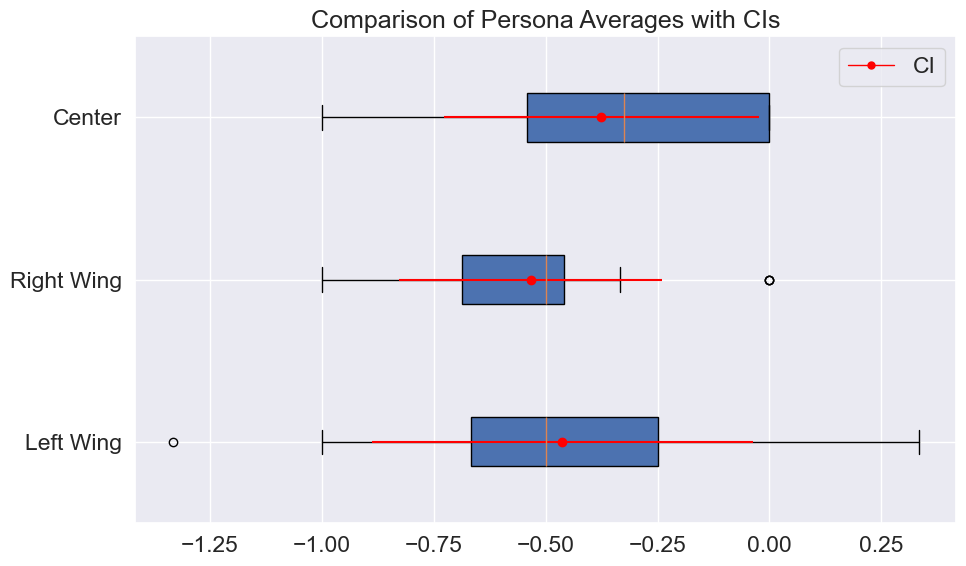

In [504]:
# Combine all data into a list
data = [Left_wing_avg, Right_wing_avg, Center_avg]
labels = ['Left Wing', 'Right Wing', 'Center']

colors = ["g","b","r"]

# Confidence intervals provided
cis = [Left_wing_ci, Right_wing_ci, Center_ci]

# Calculate means for plotting
means = [np.mean(d) for d in data]

# Calculate the CI ends for error bars
ci_lower = [mean - ci[0] for mean, ci in zip(means, cis)]
ci_upper = [ci[1] - mean for mean, ci in zip(means, cis)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create boxplot with labels
bplot = ax.boxplot(data, vert=False, patch_artist=True, labels=labels)

# Add confidence intervals as error bars
for i in range(len(labels)):
    ax.errorbar(means[i], i + 1, xerr=[[ci_lower[i]], [ci_upper[i]]], fmt='o', color='red')

# Add overall mean line
# ax.axvline(np.mean(means), color='r', linestyle='dashed', linewidth=1, label='Overall Mean')

# Add legend for confidence intervals
# mean_legend = Line2D([0], [0], color='r', linestyle='dashed', linewidth=1, label='Overall Mean')
ci_legend = Line2D([0], [0], color='red', linestyle='-', linewidth=1, marker='o', markersize=5, label='CI')
ax.legend(handles=[ci_legend], loc='upper right')

# Add labels and title
ax.set_yticklabels(labels)
ax.set_title('Comparison of Persona Averages with CIs')

# Show plot
plt.tight_layout()
plt.show()

# Topic data analysis:

In [505]:
# data = [df[df['Prompt'] == topic]['ArticleBiasAvg'].values for topic in topics]

# # Q-Q plot
# fig,ax = plt.subplots(1,4)
# fig.set_figheight(9)
# fig.set_figwidth(20)
# stats.probplot(data[0],dist="norm", plot=ax[0])
# ax[0].set_title("Abortion average")
# stats.probplot(data[1],dist="norm", plot=ax[1])
# ax[1].set_title("Climate average")
# stats.probplot(data[2],dist="norm", plot=ax[2])
# ax[2].set_title("Gun laws average")
# stats.probplot(data[3],dist="norm", plot=ax[3])
# ax[3].set_title("Immigration average")

# # Histogram
# fig,ax = plt.subplots(1,4)
# fig.set_figheight(9)
# fig.set_figwidth(20)
# ax[0].hist(data[0], bins=15, density=True, alpha=0.6, color='g')
# ax[0].set_title("Abortion average")
# ax[1].hist(data[1], bins=15, density=True, alpha=0.6, color='b')
# ax[1].set_title("Climate average")
# ax[2].hist(data[2], bins=15, density=True, alpha=0.6, color='r')
# ax[2].set_title("Gun laws average")
# ax[3].hist(data[3], bins=15, density=True, alpha=0.6, color='y')
# ax[3].set_title("Immigration average")

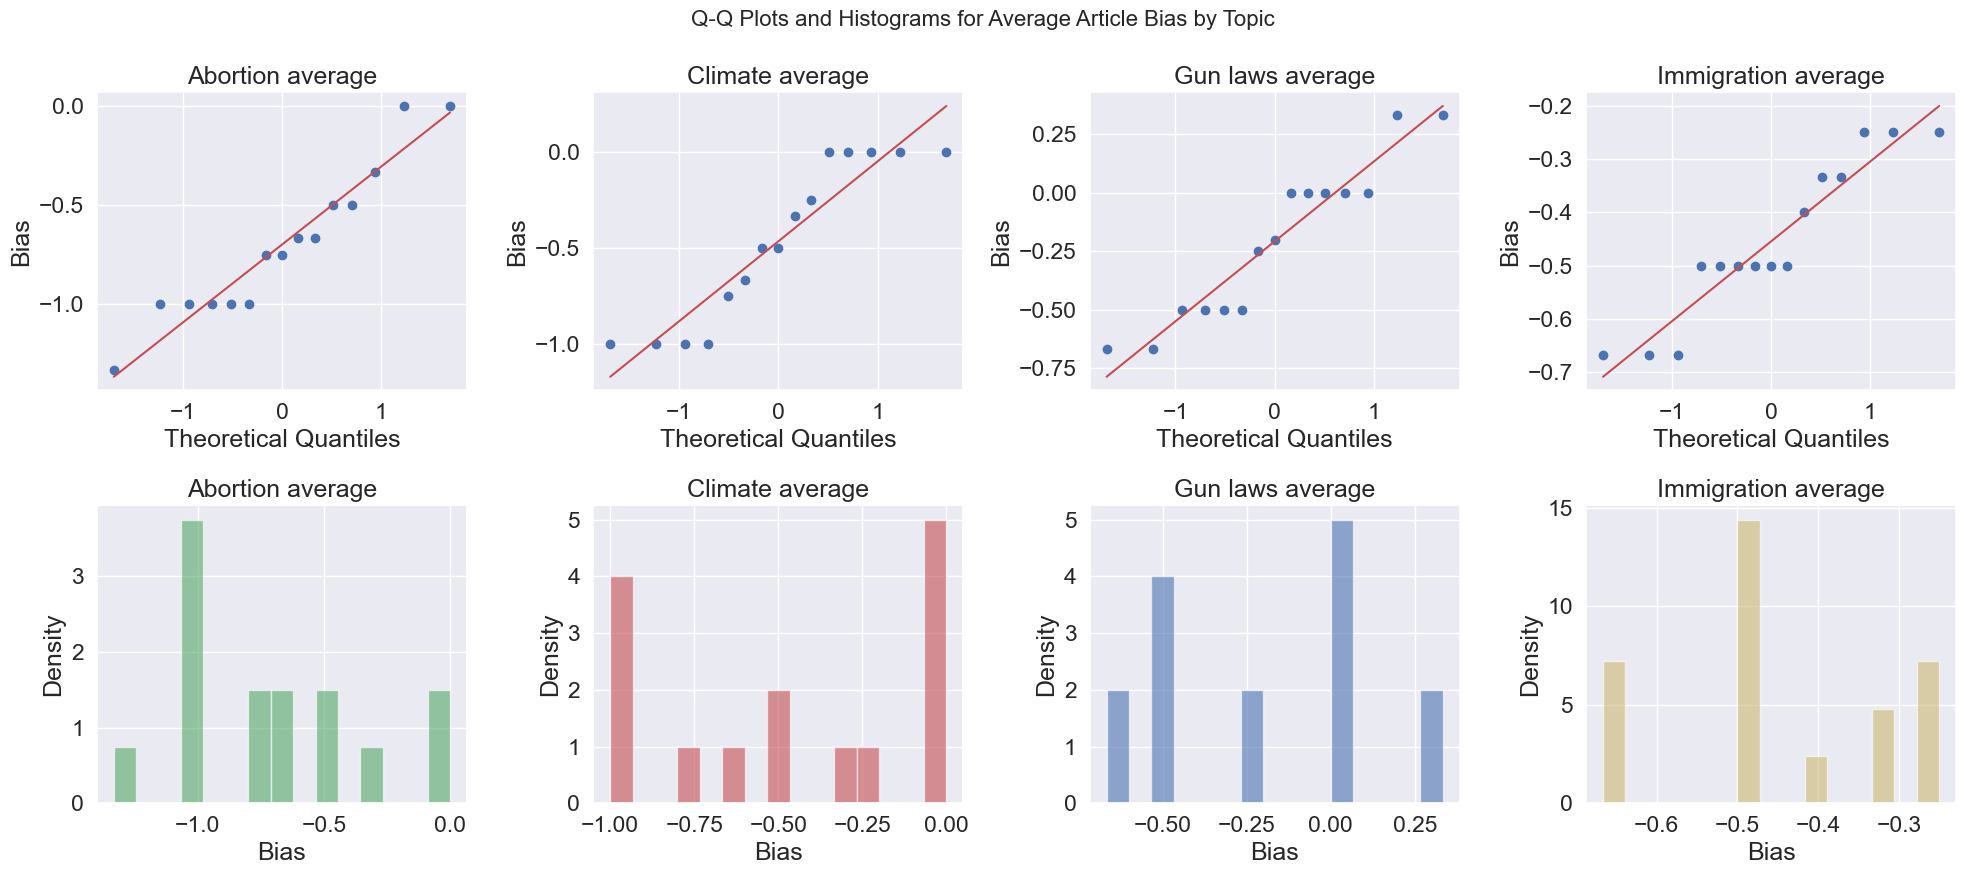

In [506]:
# Extract data for each topic from the DataFrame
data = [df[df['Prompt'] == topic]['ArticleBiasAvg'].values for topic in topics]

colors = ['g','r','b','y']

# Create a figure with 2 rows and 4 columns (Q-Q plots on top, histograms on bottom)
fig, axes = plt.subplots(2, 4, figsize=(20, 9))
fig.suptitle('Q-Q Plots and Histograms for Average Article Bias by Topic', fontsize=16)

# Q-Q plots
for i in range(4):
    stats.probplot(data[i], dist="norm", plot=axes[0, i])
    axes[0, i].set_title(f"{topics[i]} average")
    axes[0, i].set_xlabel('Theoretical Quantiles')
    axes[0, i].set_ylabel('Bias')

# Histograms
for i in range(4):
    axes[1, i].hist(data[i], bins=15, density=True, alpha=0.6, color=colors[i])
    axes[1, i].set_title(f"{topics[i]} average")
    axes[1, i].set_xlabel('Bias')
    axes[1, i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [507]:
data = [df[df['Prompt'] == topic]['ArticleBiasAvg'].values for topic in topics]


# Abortion test:
statistic, p_value = stats.shapiro(data[0])
print(f'Statistic: {statistic}, p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("The Abortion data appears to be normally distributed (fail to reject H0)")
else:
    print("The Abortion data does not appear to be normally distributed (reject H0)")

print("")

# Climate test:
statistic, p_value = stats.shapiro(data[1])
print(f'Statistic: {statistic}, p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("The Climate data appears to be normally distributed (fail to reject H0)")
else:
    print("The Climate data does not appear to be normally distributed (reject H0)")

print("")

# Gun laws test:
statistic, p_value = stats.shapiro(data[2])
print(f'Statistic: {statistic}, p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("The Gun laws data appears to be normally distributed (fail to reject H0)")
else:
    print("The Gun laws data does not appear to be normally distributed (reject H0)")

print("")

# Immigration test:
statistic, p_value = stats.shapiro(data[3])
print(f'Statistic: {statistic}, p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("The Immigration data appears to be normally distributed (fail to reject H0)")
else:
    print("The Immigration data does not appear to be normally distributed (reject H0)")

Statistic: 0.9253283087367253, p-value: 0.23211141545901315
The Abortion data appears to be normally distributed (fail to reject H0)

Statistic: 0.8451623169723219, p-value: 0.014843179934398244
The Climate data does not appear to be normally distributed (reject H0)

Statistic: 0.8997187062287997, p-value: 0.09423622299328696
The Gun laws data appears to be normally distributed (fail to reject H0)

Statistic: 0.8820550171969512, p-value: 0.050921607869432284
The Immigration data appears to be normally distributed (fail to reject H0)


In [508]:
# # Prepare data for boxplot
# data = [df[df['Prompt'] == topic]['ArticleBiasAvg'].values for topic in topics]

# overall_mean = np.mean(np.concatenate(data))

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(10, 6))

# # Create boxplot
# bplot = ax.boxplot(data, patch_artist=True, labels=topics,vert=False)

# ax.axvline(overall_mean, color='r', linestyle='dashed', linewidth=1, label='Overall Mean')

# # Add labels and title
# ax.set_xlabel('Bias')
# ax.set_ylabel('Topics')
# ax.set_title('Bias Distribution Across Topics')

# # Add grid
# ax.grid(True)

# plt.tight_layout()
# plt.show()

In [509]:
data = [df[df['Prompt'] == topic]['ArticleBiasAvg'].values for topic in topics]

Abortion_ci = stats.norm.interval(0.68,loc = np.mean(data[0]),scale=np.std(data[0]))
Climate_ci = stats.norm.interval(0.68,loc = np.mean(data[1]),scale=np.std(data[1]))
Gun_laws_ci = stats.norm.interval(0.68,loc = np.mean(data[2]),scale=np.std(data[2]))
Immigration_ci = stats.norm.interval(0.68,loc = np.mean(data[3]),scale=np.std(data[3]))

print(f"Abortion Mean: {np.mean(data[0])}, \n Abortion CI: {Abortion_ci}")
print(f"{np.mean(data[0])-Abortion_ci}\n")

print(f"Climate Mean:{np.mean(data[1])}, \n Climate CI: {Climate_ci}")
print(f"{np.mean(data[1])-Climate_ci}\n")

print(f"Gun laws Mean:{np.mean(data[2])}, \n Gun laws CI: {Gun_laws_ci}")
print(f"{np.mean(data[2])-Gun_laws_ci}\n")

print(f"Immigration Mean:{np.mean(data[3])}, \n Immigration CI: {Climate_ci}")
print(f"{np.mean(data[3])-Immigration_ci}\n")


Abortion Mean: -0.6999999999999998, 
 Abortion CI: (-1.0678847066305426, -0.33211529336945694)
[ 0.36788471 -0.36788471]

Climate Mean:-0.4666666666666667, 
 Climate CI: (-0.8655991524622426, -0.06773418087109062)
[ 0.39893249 -0.39893249]

Gun laws Mean:-0.20777777777777778, 
 Gun laws CI: (-0.5291007531615335, 0.11354519760597803)
[ 0.32132298 -0.32132298]

Immigration Mean:-0.4544444444444445, 
 Immigration CI: (-0.8655991524622426, -0.06773418087109062)
[ 0.14186498 -0.14186498]



C:\Users\canic\AppData\Local\Temp\ipykernel_36560\3993591934.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, patch_artist=True, labels=topics, vert=False)


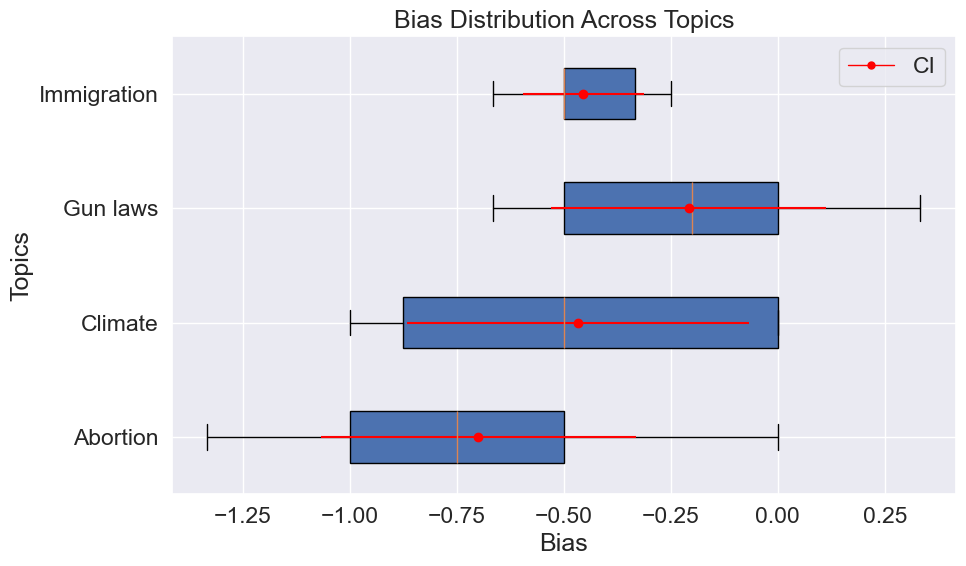

In [510]:
# Calculate means and confidence intervals using 68% confidence level (1 standard deviation)
means = [np.mean(d) for d in data]
std_devs = [np.std(d) for d in data]

cis = [stats.norm.interval(0.68, loc=mean, scale=std_dev) for mean, std_dev in zip(means, std_devs)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create boxplot
bplot = ax.boxplot(data, patch_artist=True, labels=topics, vert=False)

# Add confidence intervals as error bars
for i in range(len(topics)):
    ax.errorbar(means[i], i + 1, xerr=[[means[i] - cis[i][0]], [cis[i][1] - means[i]]], fmt='o', color='red')

# Add overall mean line
# overall_mean = np.mean(np.concatenate(data))
# ax.axvline(overall_mean, color='r', linestyle='dashed', linewidth=1, label='Overall Mean')

# Add legend for confidence intervals
# mean_legend = Line2D([0], [0], color='r', linestyle='dashed', linewidth=1, label='Overall Mean')
ci_legend = Line2D([0], [0], color='red', linestyle='-', linewidth=1, marker='o', markersize=5, label='CI')
ax.legend(handles=[ci_legend], loc='upper right')


# Add labels and title
ax.set_xlabel('Bias')
ax.set_ylabel('Topics')
ax.set_title('Bias Distribution Across Topics')

# Add grid
ax.grid(True)

plt.tight_layout()
plt.show()


# Comparison test:

In [511]:
from scipy.stats import kruskal

statistic, p_value = kruskal(Right_wing_avg, Left_wing_avg, Center_avg)

print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject null hypothesis: There is a significant difference between groups.")
else:
    print("Cannot reject null hypothesis: No significant difference found between groups.")

Kruskal-Wallis Test Statistic: 2.4000242787774786
P-value: 0.3011905556207703
Cannot reject null hypothesis: No significant difference found between groups.


In [512]:
from scipy.stats import kruskal


data = [df[df['Prompt'] == topic]['ArticleBiasAvg'].values for topic in topics]
statistic, p_value = kruskal(data[0],data[1],data[2],data[3])

print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject null hypothesis: There is a significant difference between groups.")
else:
    print("Cannot reject null hypothesis: No significant difference found between groups.")

Kruskal-Wallis Test Statistic: 12.17996381986101
P-value: 0.006791431106142267
Reject null hypothesis: There is a significant difference between groups.
